In [1]:
from fastai.data.all import *
from fastai.vision.all import *
import pandas as pd
import glob
from numpy import loadtxt
import numpy as np
from torchtools.optim import Ranger

To use this log_lamb_rs, please run 'pip install tensorboardx'. Also you must have Tensorboard running to see results


In [2]:
path = sorted(glob.glob('data\\CGnA10766\\data\\cgna\\*.jpg'),key=len)
path

['data\\CGnA10766\\data\\cgna\\1.jpg',
 'data\\CGnA10766\\data\\cgna\\2.jpg',
 'data\\CGnA10766\\data\\cgna\\3.jpg',
 'data\\CGnA10766\\data\\cgna\\4.jpg',
 'data\\CGnA10766\\data\\cgna\\5.jpg',
 'data\\CGnA10766\\data\\cgna\\6.jpg',
 'data\\CGnA10766\\data\\cgna\\7.jpg',
 'data\\CGnA10766\\data\\cgna\\8.jpg',
 'data\\CGnA10766\\data\\cgna\\9.jpg',
 'data\\CGnA10766\\data\\cgna\\10.jpg',
 'data\\CGnA10766\\data\\cgna\\11.jpg',
 'data\\CGnA10766\\data\\cgna\\12.jpg',
 'data\\CGnA10766\\data\\cgna\\13.jpg',
 'data\\CGnA10766\\data\\cgna\\14.jpg',
 'data\\CGnA10766\\data\\cgna\\15.jpg',
 'data\\CGnA10766\\data\\cgna\\16.jpg',
 'data\\CGnA10766\\data\\cgna\\17.jpg',
 'data\\CGnA10766\\data\\cgna\\18.jpg',
 'data\\CGnA10766\\data\\cgna\\19.jpg',
 'data\\CGnA10766\\data\\cgna\\20.jpg',
 'data\\CGnA10766\\data\\cgna\\21.jpg',
 'data\\CGnA10766\\data\\cgna\\22.jpg',
 'data\\CGnA10766\\data\\cgna\\23.jpg',
 'data\\CGnA10766\\data\\cgna\\24.jpg',
 'data\\CGnA10766\\data\\cgna\\25.jpg',
 'data\\C

In [3]:
aro=loadtxt('data\\arousal_avg_10766_v2.txt')
aro

array([2.84, 5.13, 3.8 , ..., 3.6 , 5.  , 4.6 ])

In [4]:
val=loadtxt('data\\valence_avg_10766_v2.txt')
val

array([8.12, 4.31, 5.92, ..., 5.2 , 6.17, 4.8 ])

In [5]:
df=pd.DataFrame(data=path,columns=['path'])
df

,path
0,data\CGnA10766\data\cgna\1.jpg
1,data\CGnA10766\data\cgna\2.jpg
2,data\CGnA10766\data\cgna\3.jpg
3,data\CGnA10766\data\cgna\4.jpg
4,data\CGnA10766\data\cgna\5.jpg
...,...
10761,data\CGnA10766\data\cgna\10762.jpg
10762,data\CGnA10766\data\cgna\10763.jpg
10763,data\CGnA10766\data\cgna\10764.jpg
10764,data\CGnA10766\data\cgna\10765.jpg


In [6]:
df['arousal']=aro
df

,path,arousal
0,data\CGnA10766\data\cgna\1.jpg,2.84
1,data\CGnA10766\data\cgna\2.jpg,5.13
2,data\CGnA10766\data\cgna\3.jpg,3.80
3,data\CGnA10766\data\cgna\4.jpg,5.32
4,data\CGnA10766\data\cgna\5.jpg,5.23
...,...,...
10761,data\CGnA10766\data\cgna\10762.jpg,4.20
10762,data\CGnA10766\data\cgna\10763.jpg,5.57
10763,data\CGnA10766\data\cgna\10764.jpg,3.60
10764,data\CGnA10766\data\cgna\10765.jpg,5.00


In [7]:
df['valence']=val
df

,path,arousal,valence
0,data\CGnA10766\data\cgna\1.jpg,2.84,8.12
1,data\CGnA10766\data\cgna\2.jpg,5.13,4.31
2,data\CGnA10766\data\cgna\3.jpg,3.80,5.92
3,data\CGnA10766\data\cgna\4.jpg,5.32,5.47
4,data\CGnA10766\data\cgna\5.jpg,5.23,4.93
...,...,...,...
10761,data\CGnA10766\data\cgna\10762.jpg,4.20,3.20
10762,data\CGnA10766\data\cgna\10763.jpg,5.57,3.00
10763,data\CGnA10766\data\cgna\10764.jpg,3.60,5.20
10764,data\CGnA10766\data\cgna\10765.jpg,5.00,6.17


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10766 entries, 0 to 10765
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   path     10766 non-null  object 
 1   arousal  10766 non-null  float64
 2   valence  10766 non-null  float64
dtypes: float64(2), object(1)
memory usage: 252.5+ KB


In [9]:
df2=df

In [10]:
df2['arousal'] = df['arousal'].astype("float32")
df2['valence'] = df['valence'].astype("float32")
df2

,path,arousal,valence
0,data\CGnA10766\data\cgna\1.jpg,2.84,8.12
1,data\CGnA10766\data\cgna\2.jpg,5.13,4.31
2,data\CGnA10766\data\cgna\3.jpg,3.80,5.92
3,data\CGnA10766\data\cgna\4.jpg,5.32,5.47
4,data\CGnA10766\data\cgna\5.jpg,5.23,4.93
...,...,...,...
10761,data\CGnA10766\data\cgna\10762.jpg,4.20,3.20
10762,data\CGnA10766\data\cgna\10763.jpg,5.57,3.00
10763,data\CGnA10766\data\cgna\10764.jpg,3.60,5.20
10764,data\CGnA10766\data\cgna\10765.jpg,5.00,6.17


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10766 entries, 0 to 10765
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   path     10766 non-null  object 
 1   arousal  10766 non-null  float32
 2   valence  10766 non-null  float32
dtypes: float32(2), object(1)
memory usage: 168.3+ KB


In [12]:
df2['arousal'] = df['arousal'].astype("float").apply(lambda x:round(x,2))
df2['valence'] = df['valence'].astype("float").apply(lambda x:round(x,2))
df2

,path,arousal,valence
0,data\CGnA10766\data\cgna\1.jpg,2.84,8.12
1,data\CGnA10766\data\cgna\2.jpg,5.13,4.31
2,data\CGnA10766\data\cgna\3.jpg,3.80,5.92
3,data\CGnA10766\data\cgna\4.jpg,5.32,5.47
4,data\CGnA10766\data\cgna\5.jpg,5.23,4.93
...,...,...,...
10761,data\CGnA10766\data\cgna\10762.jpg,4.20,3.20
10762,data\CGnA10766\data\cgna\10763.jpg,5.57,3.00
10763,data\CGnA10766\data\cgna\10764.jpg,3.60,5.20
10764,data\CGnA10766\data\cgna\10765.jpg,5.00,6.17


In [13]:
imageDB=DataBlock(blocks=(ImageBlock,RegressionBlock),
                  get_x=ColReader('path'),
                  get_y=lambda x:torch.tensor(x[1:]).numpy(),
                  item_tfms=Resize(224,ResizeMethod.Pad, PadMode.Zeros))

In [14]:
imageDBA=DataBlock(blocks=(ImageBlock,RegressionBlock),
                  get_x=ColReader('path'),
                  get_y=lambda x:torch.tensor(x[1]).numpy(),
                  item_tfms=Resize(224,ResizeMethod.Pad, PadMode.Zeros))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


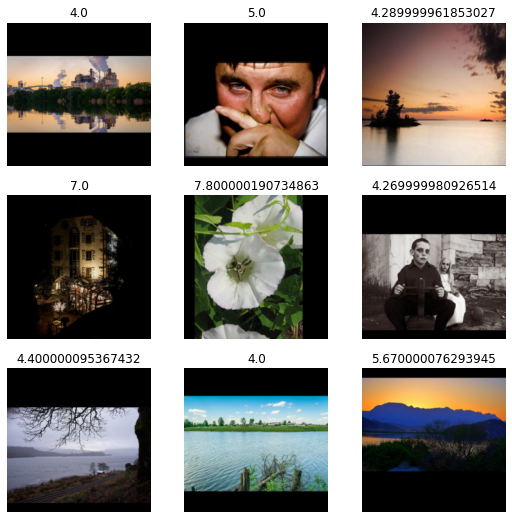

In [15]:
dlsA = imageDBA.dataloaders(df2)
dlsA.show_batch()


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


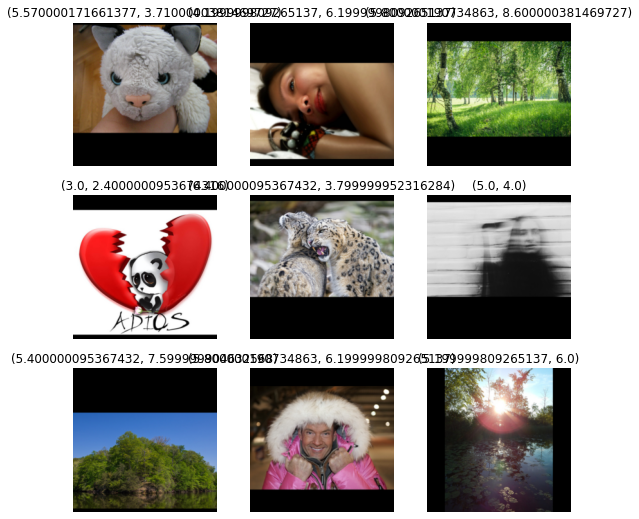

In [16]:
dls = imageDB.dataloaders(df2,bs=16)
dls.show_batch()

In [17]:
class linear(nn.Module):
    def __init__(self, lin, lout):
        super(linear, self).__init__()       
        self.lin=lin
        self.fc1 = nn.Linear(lin, 768)
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features*2)
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features*2)
        self.fc4 = nn.Linear(self.fc3.out_features, lout)
        self.activ=torch.selu
    
    # forward method
    def forward(self, x): 
        x=x.view(-1,self.lin)
        x = self.activ(self.fc1(x))
        x = self.activ(self.fc2(x))
        x = self.activ(self.fc3(x))
        fc=self.fc4(x)
        return fc

def lin_learner(data,**kwargs):
    L = linear(lin =224*224*3, lout = 2)
    learn = Learner(data, L, **kwargs)
    return learn

In [18]:
opt_func = partial(Ranger,betas=(0.95,0.99), eps=1e-6)
learn=lin_learner(dls,loss_func=nn.L1Loss(),opt_func=opt_func)

In [ ]:
learn=cnn_learner(dlsA,resnet34,MSELossFlat,pretrained=False)

In [19]:
learn.lr_find()
learn.recorder.plot_lr_find()

AttributeError: 'Lookahead' object has no attribute 'set_hypers'

In [ ]:
learn.fit_flat_cos(100,1e-2,pct_start=0.75, cbs=[EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=7)])

In [20]:
learn.fit_flat_cos(50,2e-5,pct_start=0.75)

AttributeError: 'Lookahead' object has no attribute 'set_hyper'

In [ ]:
t=learn.get_preds(with_input=True)

In [ ]:
for k,l in zip(t[1],t[2]):
    print("pred: "+str(k)+" tar: "+str(l))

In [ ]:
show_image(t[0][0])

In [ ]:
ap=[]
agt=[]
vp=[]
vgt=[]
for i,j in zip(t[1],t[2]):
    ap.append(i[0].item())
    vp.append(j[0].item())
    agt.append(i[1].item())
    vgt.append(j[1].item())

In [ ]:
plt.figure(figsize=(120,5))
plt.plot(ap, 'g', agt, 'r')
plt.show()

In [ ]:
plt.figure(figsize=(120,5))
plt.plot(vp, 'g', vgt, 'r')
plt.show()